# What experiment did I do?

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random

# Image Load

In [2]:
mnist = pd.read_csv("../../data/datasets/train.csv")

In [3]:
y = mnist.iloc[:, 0].values
x = mnist.iloc[:, 1:].values
#split target value and image

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#make valid set

In [5]:
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
#normalization

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
#example  3 traget value   to    [0,0,0,1,0,0,0,0,0,0]
#one hot encoding

In [7]:
learning_rate = 0.00062

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=20, kernel_size=(3, 3), input_shape=(28,28,1),activation='relu',kernel_initializer='glorot_uniform',padding="same"))
for a in range(3):
    model.add(tf.keras.layers.Conv2D(filters=62, kernel_size=(3, 3), activation='relu',kernel_initializer='glorot_uniform',padding="same"))
    model.add(tf.keras.layers.Dropout(0.38))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=62, kernel_initializer='glorot_normal', activation='relu'))
model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))
model.summary()
#it is make by experiment

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        200       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 62)        11222     
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 62)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 62)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 62)          34658     
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 62)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 62)          0

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate), metrics=['accuracy'])
#adam and RMSprop but experiment said "rmsprop is a little little very little better"

In [10]:
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', monitor='val_loss', save_best_only=True),
            #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 30, verbose=1)]
#i used to ealrystopping but ModelCheckpoint is more better
#i think because it's too small scale to overfit

In [11]:
history = model.fit(x_train, y_train, batch_size=100, epochs=620,validation_data =(x_test,y_test),callbacks=callbacks,verbose=2)
#why 620?
#because its my birthday

Epoch 1/620
294/294 - 59s - loss: 0.7478 - accuracy: 0.7538 - val_loss: 0.5919 - val_accuracy: 0.9422
Epoch 2/620


KeyboardInterrupt: 

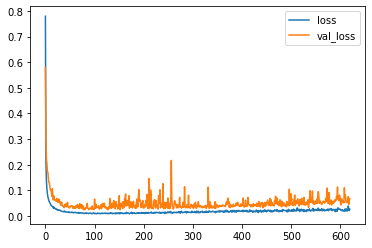

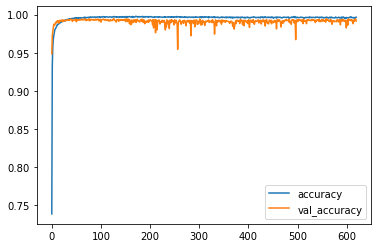

In [12]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();
#check the overfitting

In [13]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
#one hot enciding

# submission

In [14]:
model = tf.keras.models.load_model('./model.h5') 
#use ModelCheckpoint

In [15]:
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv").values
test = test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_pred = model.predict(test).argmax(axis=1)
#predict

In [16]:
submission = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': y_pred})
submission.to_csv("submissionmax.csv", index = False)
#to_csv